# Analysis 3 - Online Learning

In this notebook we will compare the different voting rules on an online learning scenario. We have different aggregators with different scoring rules, and each aggregator start with 0 training data. Then each aggregator use the data from the successive aggregations to train the embeddings.

In [1]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(42)

We will comapre 5 rules : *FastNash*, *FastSum*, *SumScores*, *ProductScores*, *MLEGaussian*

In [2]:
list_agg = [ev.AggregatorFastNash(), 
            ev.AggregatorFastSum(),
            ev.AggregatorSum(),
            ev.AggregatorProduct(),
            ev.AggregatorMLEGaussian()]

For the generator, we use a model with $30$ algorithms in the same group $G_1$, $2$ algorithms in agroup $G_2$ and $5$ algorithms between the two (but closer to $G_2$)

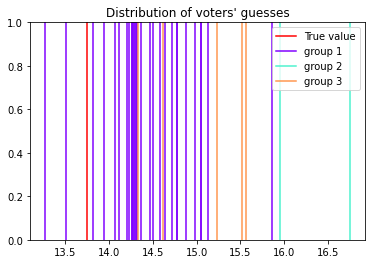

In [3]:
groups_sizes = [30, 2, 5]
features = [[1, 0], [0, 1], [0.3,0.7]]

generator = ev.RatingsGeneratorEpistemicGroupedMix(groups_sizes, features, group_noise=8, independent_noise=0.5)
generator.plot_ratings()

In [4]:
onlineLearning = ev.OnlineLearning(list_agg, generator)

Each election contains $20$ alternatives, we run $50$ successive elections for each experiment and run this $1000$ times.

In [5]:
n_candidates = 20
n_steps = 50
n_try = 1000
onlineLearning(n_candidates, n_steps, n_try)

100%|██████████| 1000/1000 [1:03:22<00:00,  3.80s/it]


Finally, we can display the result of the experiment

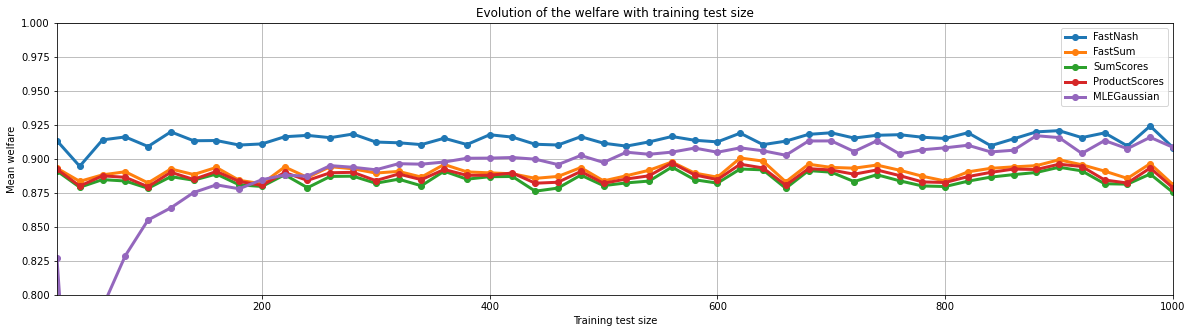

In [6]:
onlineLearning.plot()